Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Reading the Dataset

In [6]:
data = pd.read_csv('data.csv')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [3]:
data.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928


Preprocessing the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [5]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [7]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Checking for Null values

In [9]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

**Since there are no null values we do not need to worry about filing the null values**

## **Performing EDA**

<AxesSubplot:xlabel='popularity', ylabel='Density'>

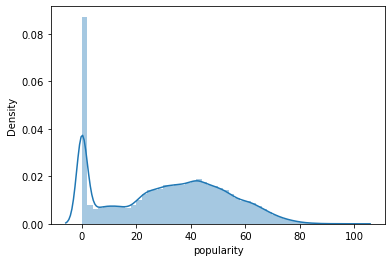

In [21]:
sns.distplot(data['popularity'])

<AxesSubplot:xlabel='year', ylabel='popularity'>

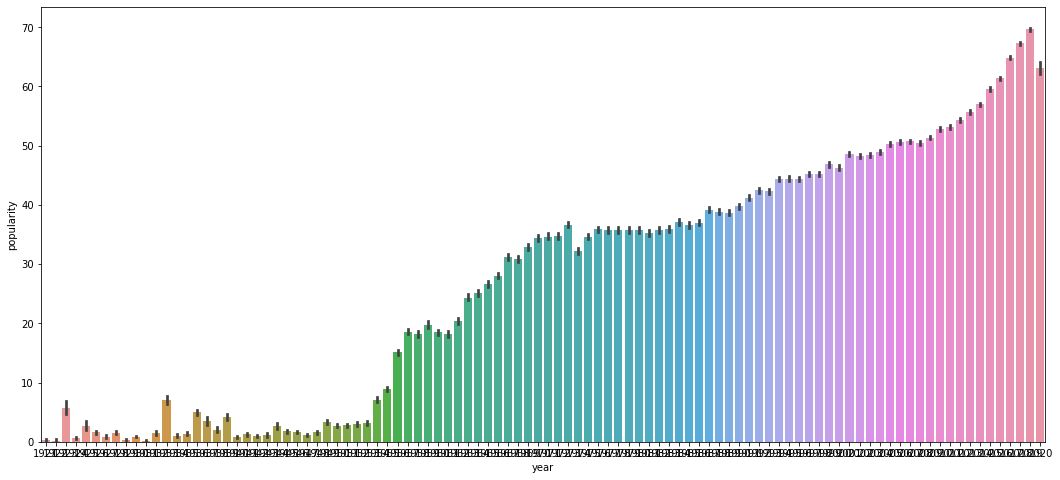

In [23]:
plt.figure(figsize=(18,8))
sns.barplot(x='year', y='popularity',data=data)

Text(0.5, 1.0, 'Popularity based on Key')

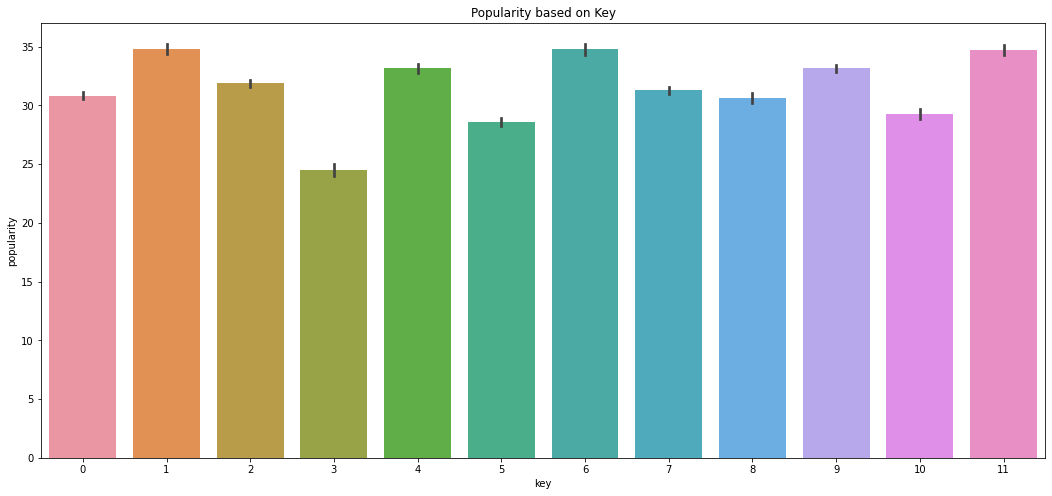

In [25]:
plt.figure(figsize=(18,8))
sns.barplot(x='key', y='popularity',data=data)
plt.title('Popularity based on Key')

Text(0.5, 1.0, 'Popularity based on Mode')

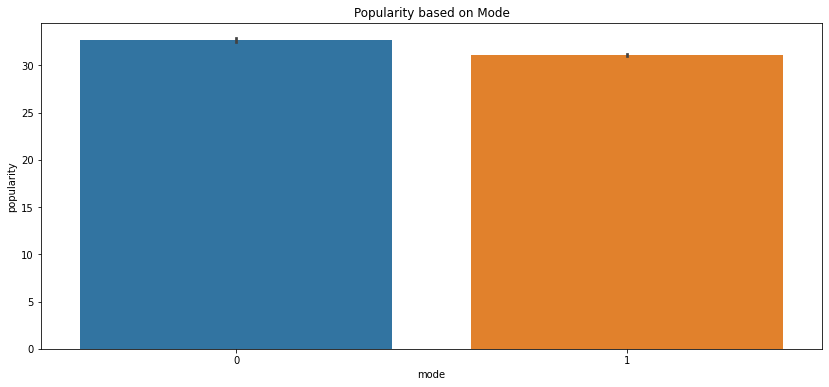

In [28]:
plt.figure(figsize=(14,6))
sns.barplot(x='mode', y='popularity',data=data)
plt.title('Popularity based on Mode')

Text(0.5, 1.0, 'Popularity based on Mode')

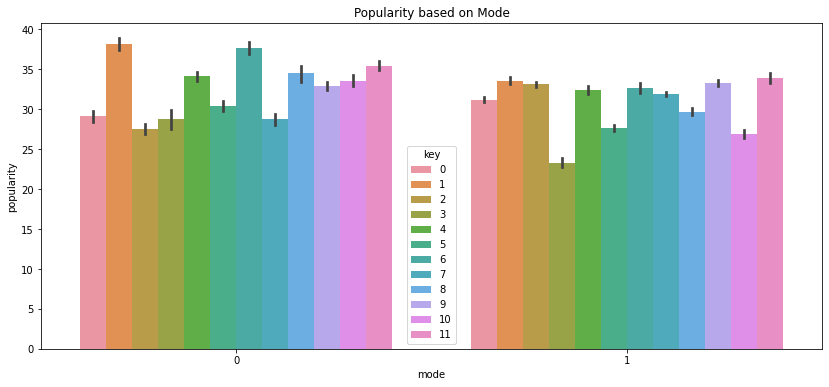

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(x='mode', y='popularity',hue='key',data=data)
plt.title('Popularity based on Mode')

Text(0.5, 1.0, 'Popularity based on Explicitness')

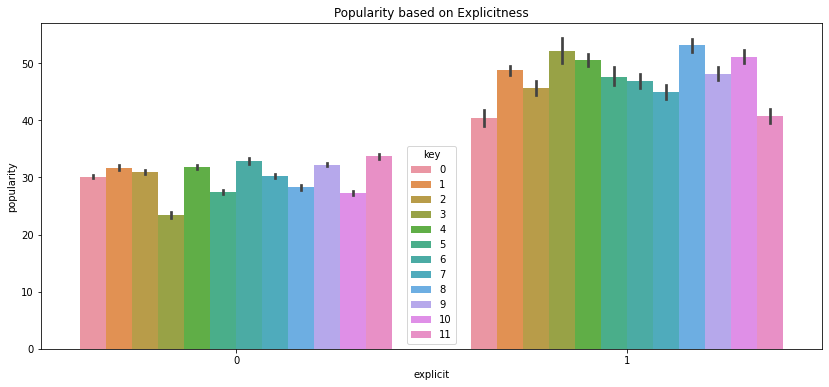

In [33]:
plt.figure(figsize=(14,6))
sns.barplot(x='explicit', y='popularity',hue='key',data=data)
plt.title('Popularity based on Explicitness')

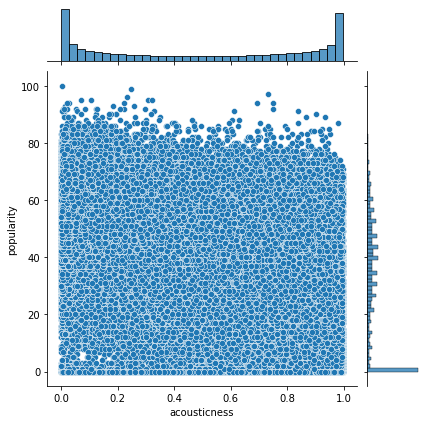

In [31]:
sns.jointplot(x = 'acousticness', y = 'popularity', data=data)

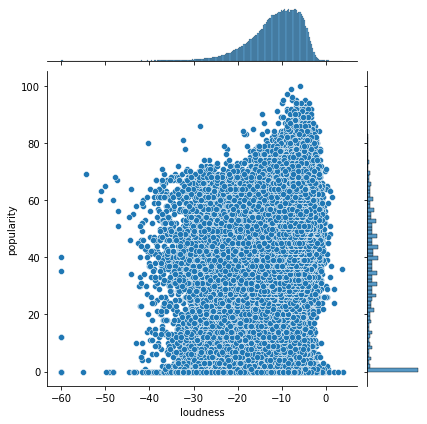

In [32]:
sns.jointplot(x = 'loudness', y = 'popularity', data = data)

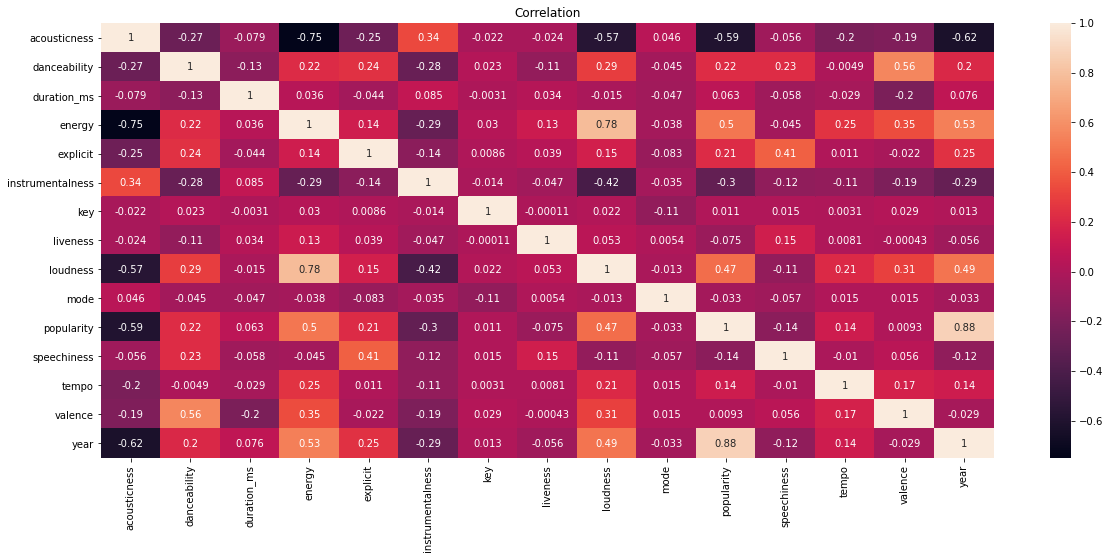

In [14]:
# finding correlation
corr = data.corr()
# visualizing correlaiton with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr,color='blue', annot = True)
plt.title('Correlation')
plt.show()

## Performing Time Series analysis

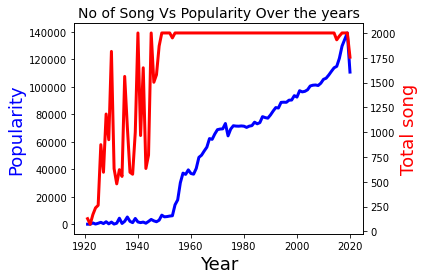

In [25]:
# lets analyze the increasing listener over the year
year_grp = data.groupby(['year'], as_index=False)
popularity_track = year_grp[['name', 'popularity']].sum()
song_count = year_grp['name'].count()


#dual axis graph
fig, ax1 = plt.subplots()
# Popularity of songs
ax1.plot(popularity_track.year, popularity_track.popularity, color='blue', linewidth=3,)
ax1.set_title('No of Song Vs Popularity Over the years', fontsize=14)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Popularity', color='blue', fontsize=18)
# Adding second axis to the graph
ax2 = ax1.twinx()
# No of songs 
ax2.plot(song_count.year, song_count.name, color='red', linewidth=3)
ax2.set_ylabel('Total song', color='red', fontsize=18)
fig.tight_layout()
plt.show()

In [26]:
# lets see the increase of artists over the year
artists_data = {}
# Avoid duplicates
added = []
for year in data['year'].unique():
    # temporary container 
    total_artist = []
    for artist in data[data.year == year]['artists'].unique():
        if artist not in added:
            total_artist.append(artist)
    artists_data[year] = len(total_artist)
    added.extend(total_artist)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


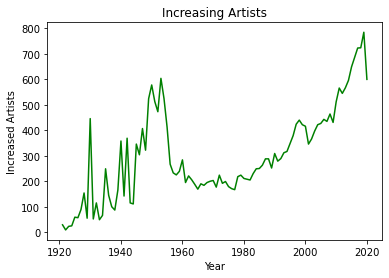

In [28]:
# creating dataframe 
artists_record = pd.DataFrame({'Year': list(artists_data.keys()),
                              'Increased_artists': list(artists_data.values())})
# line plot 
sns.lineplot('Year', 'Increased_artists', color='green', data=artists_record)
plt.title('Increasing Artists')
plt.xlabel('Year')
plt.ylabel('Increased Artists')
plt.show()
